In [1]:
import whisper
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from src.models.slime import SLIME
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from src.data.dataset import CommonVoice

/Users/diego/dev/BATS/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/diego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
np.random.seed(21)
ds_test = CommonVoice("test", use_mfcc=False)
x, y = ds_test[4]

In [3]:
ds_test.vocab.decode(y.numpy())

'it is a busy market town that serves a large surrounding area . <pad> <pad>'

In [4]:
f = whisper.load_model("tiny")
g = LinearRegression()
#g = DecisionTreeRegressor(max_depth=5)
sample_rate = 16_000
segment_length = 500

explainer = SLIME(f, g, sample_rate, segment_length)

In [5]:
explainer.fit(x.numpy(), n_perturbations=100)

/Users/diego/dev/BATS/.venv/lib/python3.10/site-packages/whisper/transcribe.py:115: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


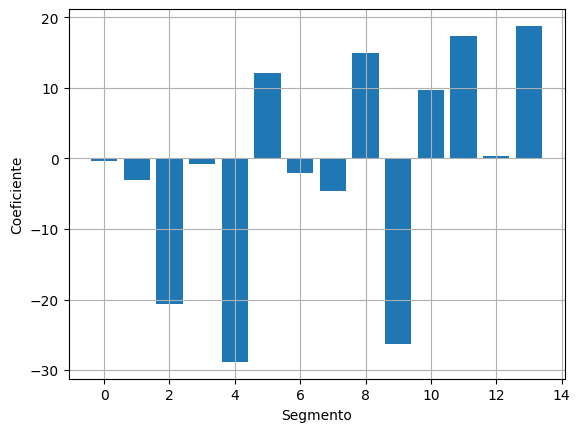

In [13]:
plt.bar(np.arange(explainer.n_segments), explainer.coef)
plt.grid()
plt.xlabel('Segmento')
plt.ylabel('Coeficiente')
plt.savefig('./paper/images/coefficients.png')
plt.show()

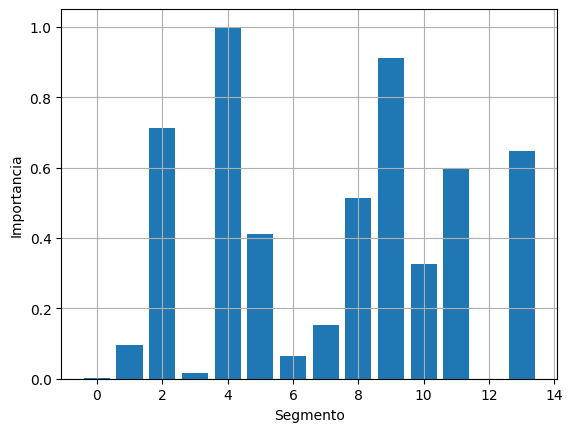

In [14]:
plt.bar(np.arange(explainer.n_segments), explainer.segment_importance)
plt.grid()
plt.xlabel('Segmento')
plt.ylabel('Importancia')
plt.savefig('./paper/images/slime.png')
plt.show()

In [11]:
sd.play(x*10, sample_rate)

In [12]:
explainer.explain(x)